# Team BNP: Tactical Asset Allocation Using Machine Learning

Renjie Pan (renjie.pan@nyu.edu)

Tianyu Zhang (tianyuzhang@nyu.edu)

Liang Zou (liazou@nyu.edu)

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
data_file_name = 'Return Data.xlsx'
return_data = pd.read_excel(data_file_name, 0, header=[0, 1])

In [3]:
return_data.columns = return_data.columns.droplevel()
return_data = return_data.sort_values(by = ['Date'])
return_data = return_data.set_index('Date')

In [4]:
return_data.head()

,MXEF Index,SPX Index,SXXP Index,MXJP Index,MXWO Index,RTY Index,SPGSCLTR Index,CRBIX Index,GOLDS Comdty,SPGSCITR Index,G4O2 Index,G4D0 Index,C0A0 Index,H0A0 Index,G0P0 Index
Date,,,,,,,,,,,,,,,
1987-12-31,100.00,241.0,71.10,1024.01,407.99,120.306,111.262,NaN,484.10,1069.27,129.895,99.533,120.306,92.729,113.266
1988-01-29,109.42,250.5,72.00,1134.73,417.21,125.323,114.561,NaN,458.00,1097.69,134.690,99.715,123.929,94.484,115.391
1988-02-29,109.68,258.1,75.45,1226.21,440.68,136.332,109.150,NaN,426.15,1085.56,135.562,101.179,125.104,96.209,116.118
1988-03-31,120.64,265.7,76.07,1275.03,453.23,142.497,117.404,NaN,456.95,1140.29,132.367,100.945,122.665,95.132,114.782
1988-04-29,126.27,262.6,78.49,1295.12,458.16,145.599,125.183,NaN,449.00,1175.63,130.507,99.436,120.527,94.601,113.750


## Momentum

1.       Avg 1mo return

2.       Avg 3mo return

3.       Avg 6mo return

4.       Avg calendar month return (Jan, Feb, Mar, etc) 

5.       Average calendar quarter return (1Q, 2Q, 3Q, 4Q)

In [5]:
def plot_df(df, plot_fun):
    """
    Plot dataframe in 5 * 3 dimensions with given plot function
    @param df: Pandas DataFrame
    @param plot_fun: function to plot (bar chart, time seris, etc.)
    """
    col_names = df.columns.values
    
    fig = plt.figure(figsize=(20,30))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i in range(len(col_names)):
        ax = fig.add_subplot(5, 3, i+1)
        plot_fun(df.index, df.iloc[:,i]);
        plt.xlabel(str(df.index.name))
        plt.title(col_names[i])

In [6]:
def plot_bar(df):
    """
    Plot all time series in one bar chart
    @param df: Pandas DataFrame
    """
    
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 18 and height to 12
    fig_size[0] = 18
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    df.plot.bar(rot=0);

### Average 1 month return

In [7]:
avg_1m_return = return_data.pct_change()
avg_1m_return.iloc[1:,].head()

,MXEF Index,SPX Index,SXXP Index,MXJP Index,MXWO Index,RTY Index,SPGSCLTR Index,CRBIX Index,GOLDS Comdty,SPGSCITR Index,G4O2 Index,G4D0 Index,C0A0 Index,H0A0 Index,G0P0 Index
Date,,,,,,,,,,,,,,,
1988-01-29,0.094200,0.039419,0.012658,0.108124,0.022599,0.041702,0.029651,NaN,-0.053914,0.026579,0.036914,0.001829,0.030115,0.018926,0.018761
1988-02-29,0.002376,0.030339,0.047917,0.080618,0.056255,0.087845,-0.047232,NaN,-0.069541,-0.011050,0.006474,0.014682,0.009481,0.018257,0.006300
1988-03-31,0.099927,0.029446,0.008217,0.039814,0.028479,0.045220,0.075621,NaN,0.072275,0.050416,-0.023569,-0.002313,-0.019496,-0.011194,-0.011506
1988-04-29,0.046668,-0.011667,0.031813,0.015756,0.010877,0.021769,0.066258,NaN,-0.017398,0.030992,-0.014052,-0.014949,-0.017430,-0.005582,-0.008991
1988-05-31,0.026530,-0.024752,0.004587,-0.043988,-0.021674,-0.028661,-0.027264,NaN,0.014477,0.035317,-0.021125,-0.010720,-0.015731,-0.005740,-0.012413


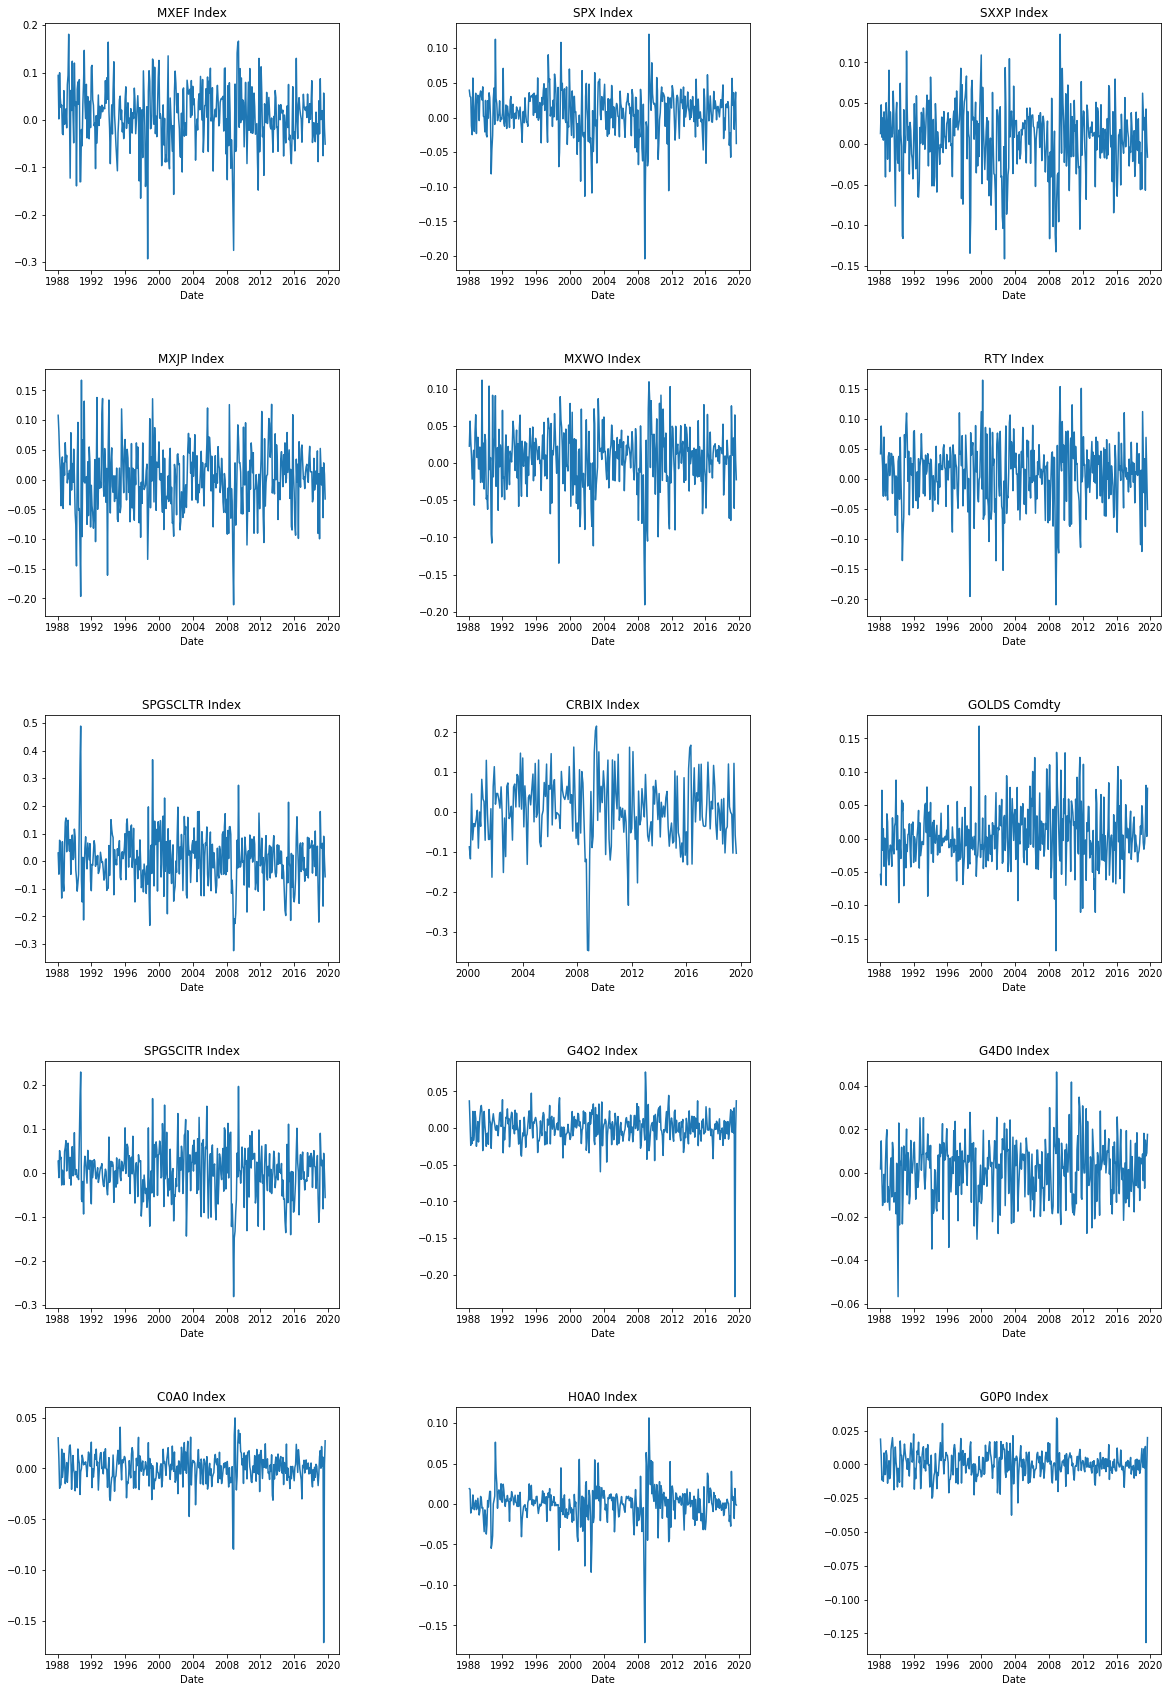

In [8]:
plot_df(avg_1m_return, plt.plot)

### Average 3 months return

In [9]:
avg_3m_return = avg_1m_return.rolling(3).mean()
avg_3m_return.iloc[3:,].head()

,MXEF Index,SPX Index,SXXP Index,MXJP Index,MXWO Index,RTY Index,SPGSCLTR Index,CRBIX Index,GOLDS Comdty,SPGSCITR Index,G4O2 Index,G4D0 Index,C0A0 Index,H0A0 Index,G0P0 Index
Date,,,,,,,,,,,,,,,
1988-03-31,0.065501,0.033068,0.022931,0.076185,0.035777,0.058256,0.019346,NaN,-0.017060,0.021982,0.006607,0.004733,0.006700,0.008663,0.004519
1988-04-29,0.049657,0.016039,0.029316,0.045396,0.031870,0.051611,0.031549,NaN,-0.004888,0.023453,-0.010382,-0.000860,-0.009148,0.000494,-0.004732
1988-05-31,0.057708,-0.002325,0.014872,0.003861,0.005894,0.012776,0.038205,NaN,0.023118,0.038909,-0.019582,-0.009327,-0.017552,-0.007505,-0.010970
1988-06-30,0.034917,0.006863,0.025238,-0.000289,-0.004632,0.020871,-0.031591,NaN,-0.014841,0.012792,-0.004172,-0.008780,-0.004729,-0.000042,-0.004286
1988-07-29,0.009913,0.008782,0.022240,0.007142,-0.002559,0.010078,-0.030157,NaN,-0.008851,0.004433,-0.005145,-0.008310,-0.001878,0.002299,-0.003761


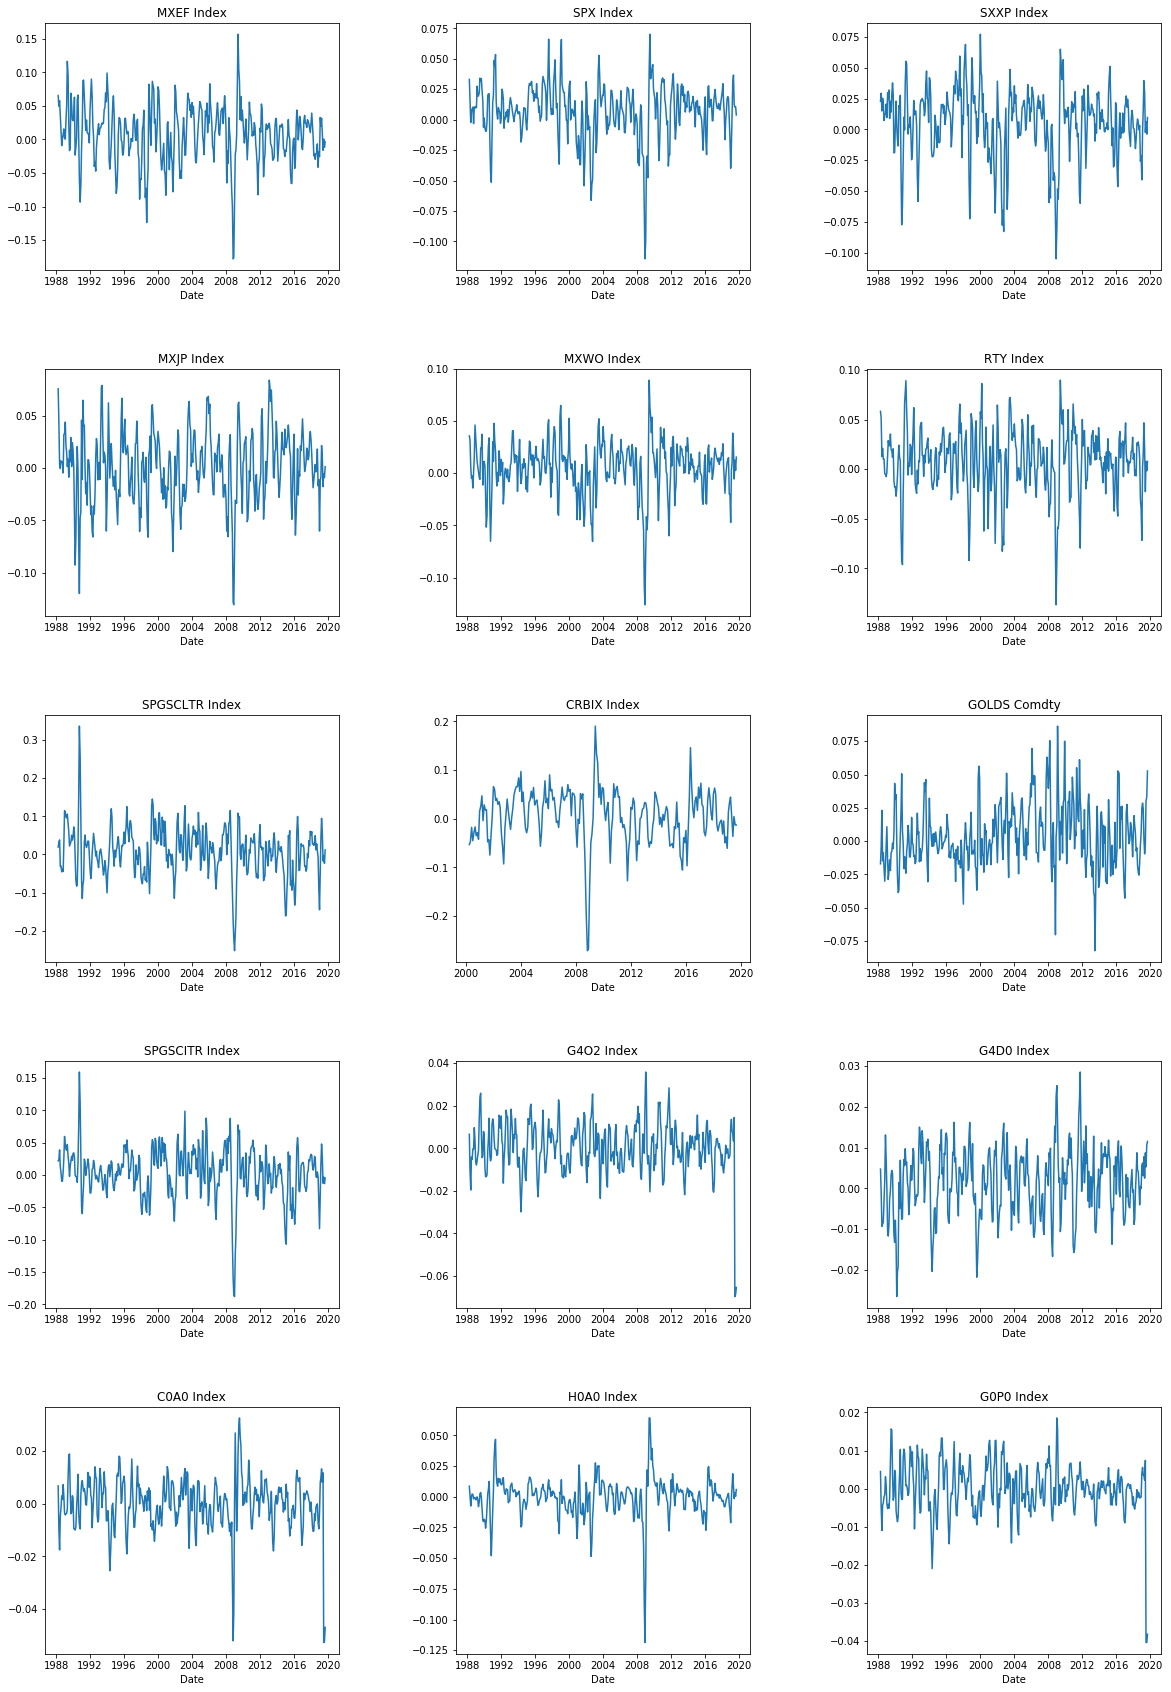

In [10]:
plot_df(avg_3m_return, plt.plot)

### Average 6 months return

In [11]:
avg_6m_return = avg_1m_return.rolling(6).mean()
avg_6m_return.iloc[6:,].head()

,MXEF Index,SPX Index,SXXP Index,MXJP Index,MXWO Index,RTY Index,SPGSCLTR Index,CRBIX Index,GOLDS Comdty,SPGSCITR Index,G4O2 Index,G4D0 Index,C0A0 Index,H0A0 Index,G0P0 Index
Date,,,,,,,,,,,,,,,
1988-06-30,0.050209,0.019966,0.024084,0.037948,0.015572,0.039564,-0.006123,NaN,-0.015951,0.017387,0.001217,-0.002024,0.000986,0.004310,0.000116
1988-07-29,0.029785,0.012411,0.025778,0.026269,0.014656,0.030845,0.000696,NaN,-0.006870,0.013943,-0.007763,-0.004585,-0.005513,0.001396,-0.004246
1988-08-31,0.024258,0.004010,0.011011,0.004742,-0.004156,0.011490,-0.003790,NaN,0.001267,0.014659,-0.009935,-0.006266,-0.007325,-0.002821,-0.006521
1988-09-30,0.017954,0.001820,0.018057,0.002728,-0.002131,0.008094,-0.034480,NaN,-0.022487,0.001705,-0.002250,-0.003389,-0.001578,-0.000858,-0.002910
1988-10-31,0.008680,0.009610,0.017688,0.001326,0.006852,0.002409,-0.037414,NaN,-0.013427,0.004607,0.002294,0.002403,0.002654,0.000833,-0.000312


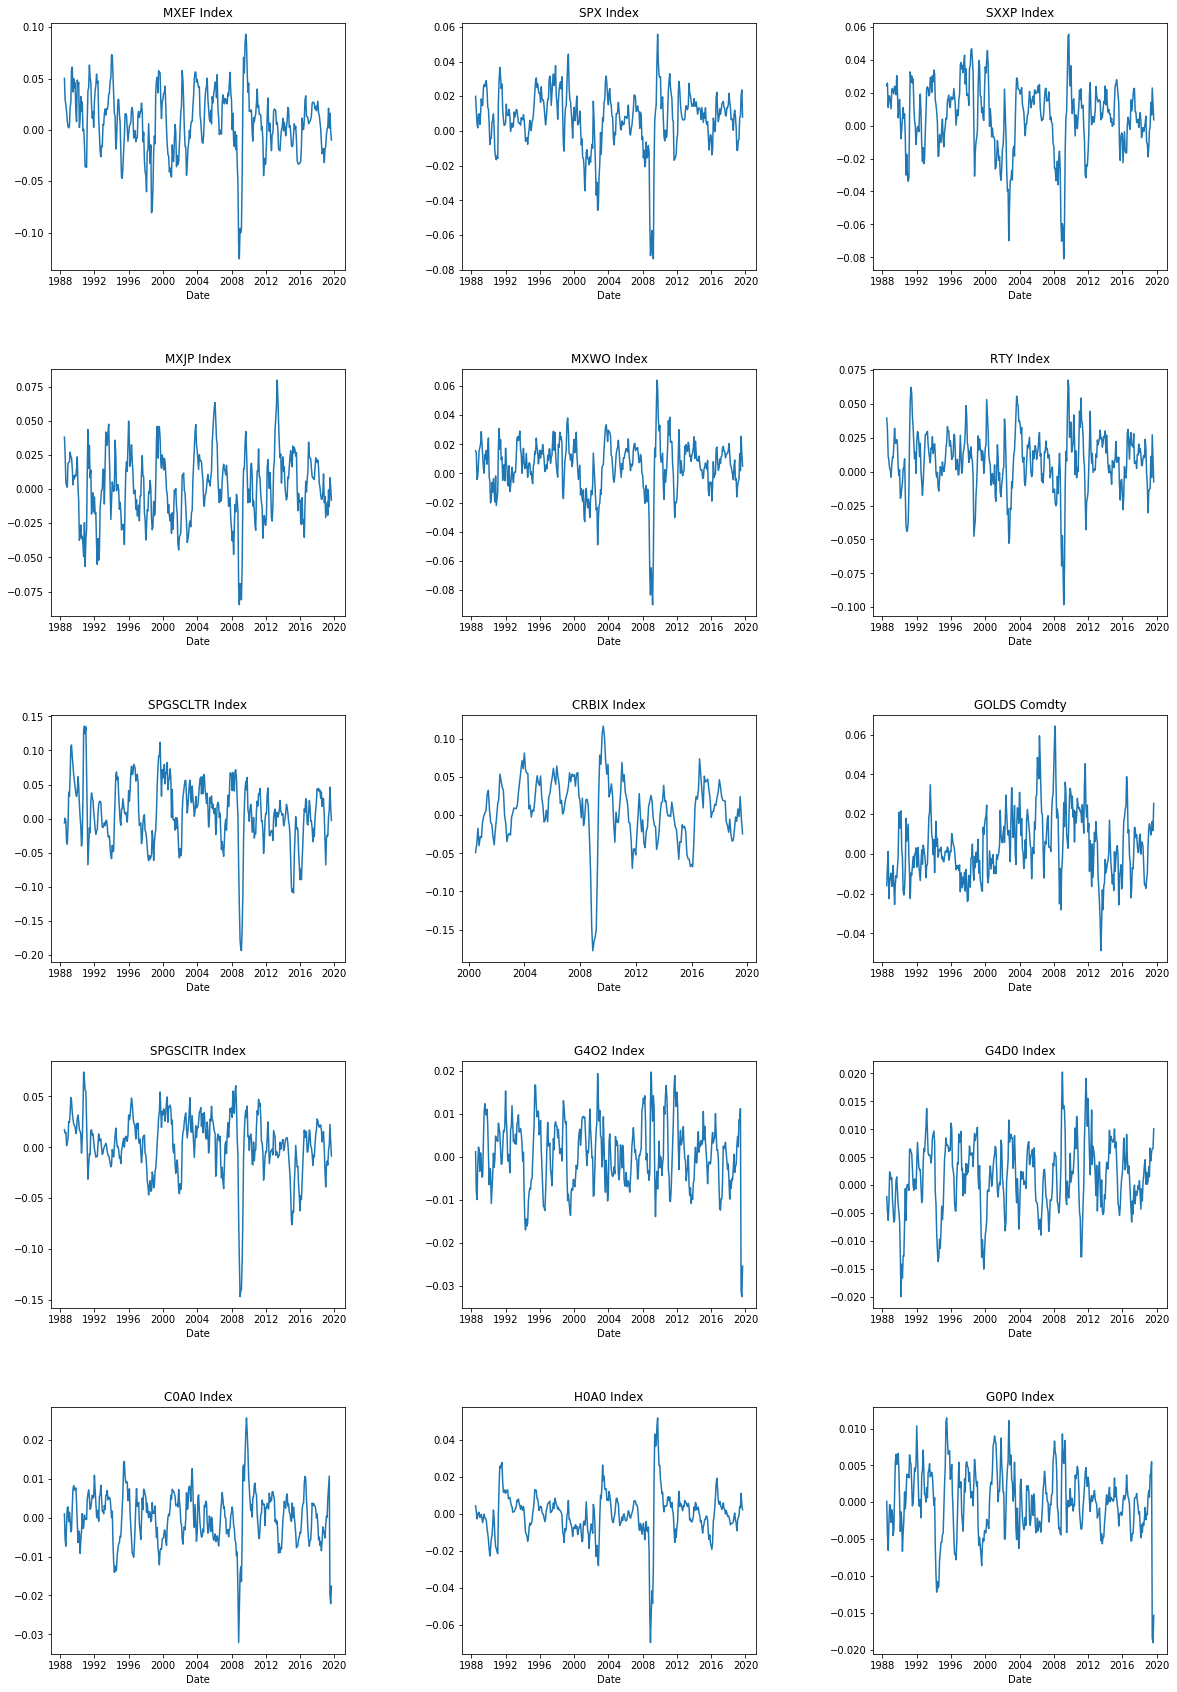

In [12]:
plot_df(avg_6m_return, plt.plot)

### Average calendar month return

In [13]:
avg_1m_return['Date'] = avg_1m_return.index
avg_1m_return['Month'] = avg_1m_return.apply(lambda x: x['Date'].month, axis=1)
calendar_month_return = avg_1m_return.groupby(['Month']).mean()
calendar_month_return

,MXEF Index,SPX Index,SXXP Index,MXJP Index,MXWO Index,RTY Index,SPGSCLTR Index,CRBIX Index,GOLDS Comdty,SPGSCITR Index,G4O2 Index,G4D0 Index,C0A0 Index,H0A0 Index,G0P0 Index
Month,,,,,,,,,,,,,,,
1,0.015790,0.010177,0.009334,0.000782,0.001306,0.007265,0.005007,0.001373,0.013686,0.002037,0.002585,0.002630,0.003748,0.008527,0.001307
2,0.017141,0.008581,0.009702,0.003813,0.004947,0.013052,0.013599,0.021889,0.005883,0.013707,-0.002559,0.000852,-0.001676,0.002701,-0.001229
3,0.013999,0.008137,0.008070,0.004225,0.007263,0.015541,0.038125,0.001554,-0.006679,0.019488,-0.004369,-0.000279,-0.004996,-0.001518,-0.003668
4,0.027670,0.012462,0.021058,0.019337,0.020583,0.013084,0.033990,0.023878,0.003179,0.018903,-0.002957,-0.002682,0.000200,0.008153,-0.001374
5,-0.002927,0.011261,0.000078,-0.004063,0.001062,0.010342,-0.001864,-0.009258,-0.001374,-0.002220,0.003294,0.001214,0.002120,-0.001454,0.001185
6,-0.006791,0.005832,-0.008237,-0.002627,-0.003854,0.006051,0.013119,-0.004442,-0.001024,0.005138,-0.004383,-0.001709,-0.003922,-0.002620,-0.002811
7,0.012608,0.005730,0.012894,0.003090,0.013296,-0.002267,0.008891,0.015195,0.002937,0.000747,0.003076,0.004590,0.003747,0.002076,0.001622
8,-0.018603,-0.003198,-0.012055,-0.017590,-0.013357,-0.006011,0.018777,-0.021620,0.008220,0.012016,0.007039,0.005437,0.002920,-0.004123,0.002630
9,-0.002821,-0.001069,-0.013969,-0.009649,-0.004766,0.000301,0.027278,-0.022850,0.015732,0.009041,0.005829,0.003534,0.000312,-0.007542,0.002915


A mixed graph is shown below, please zoom in if you cannot see the bars clearly

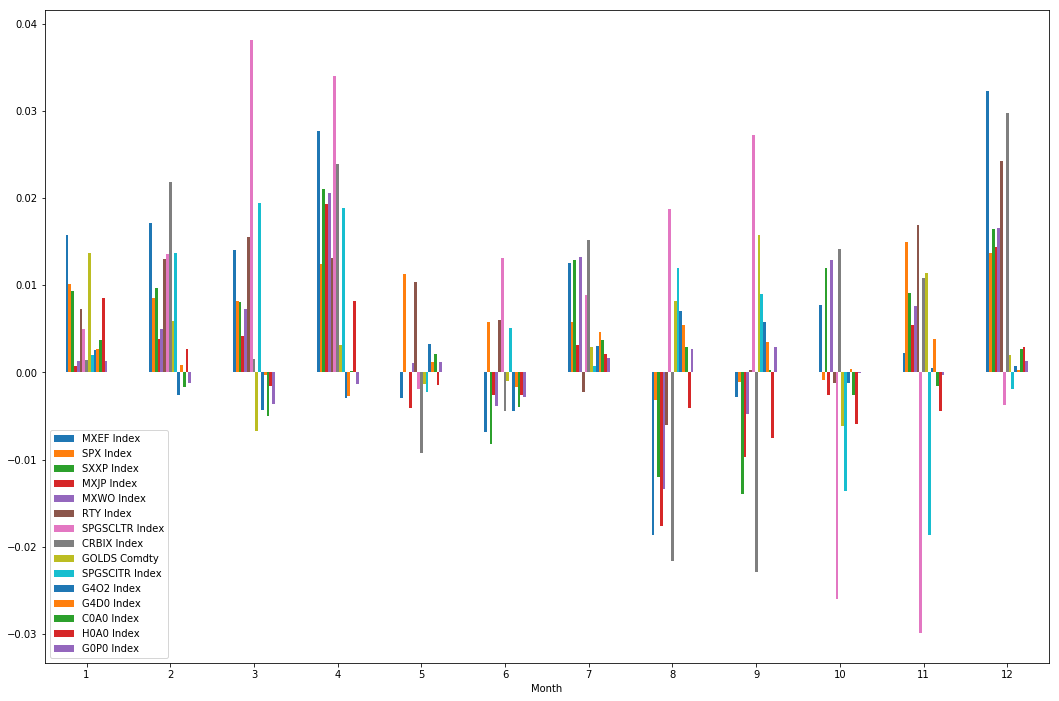

In [14]:
plot_bar(calendar_month_return)

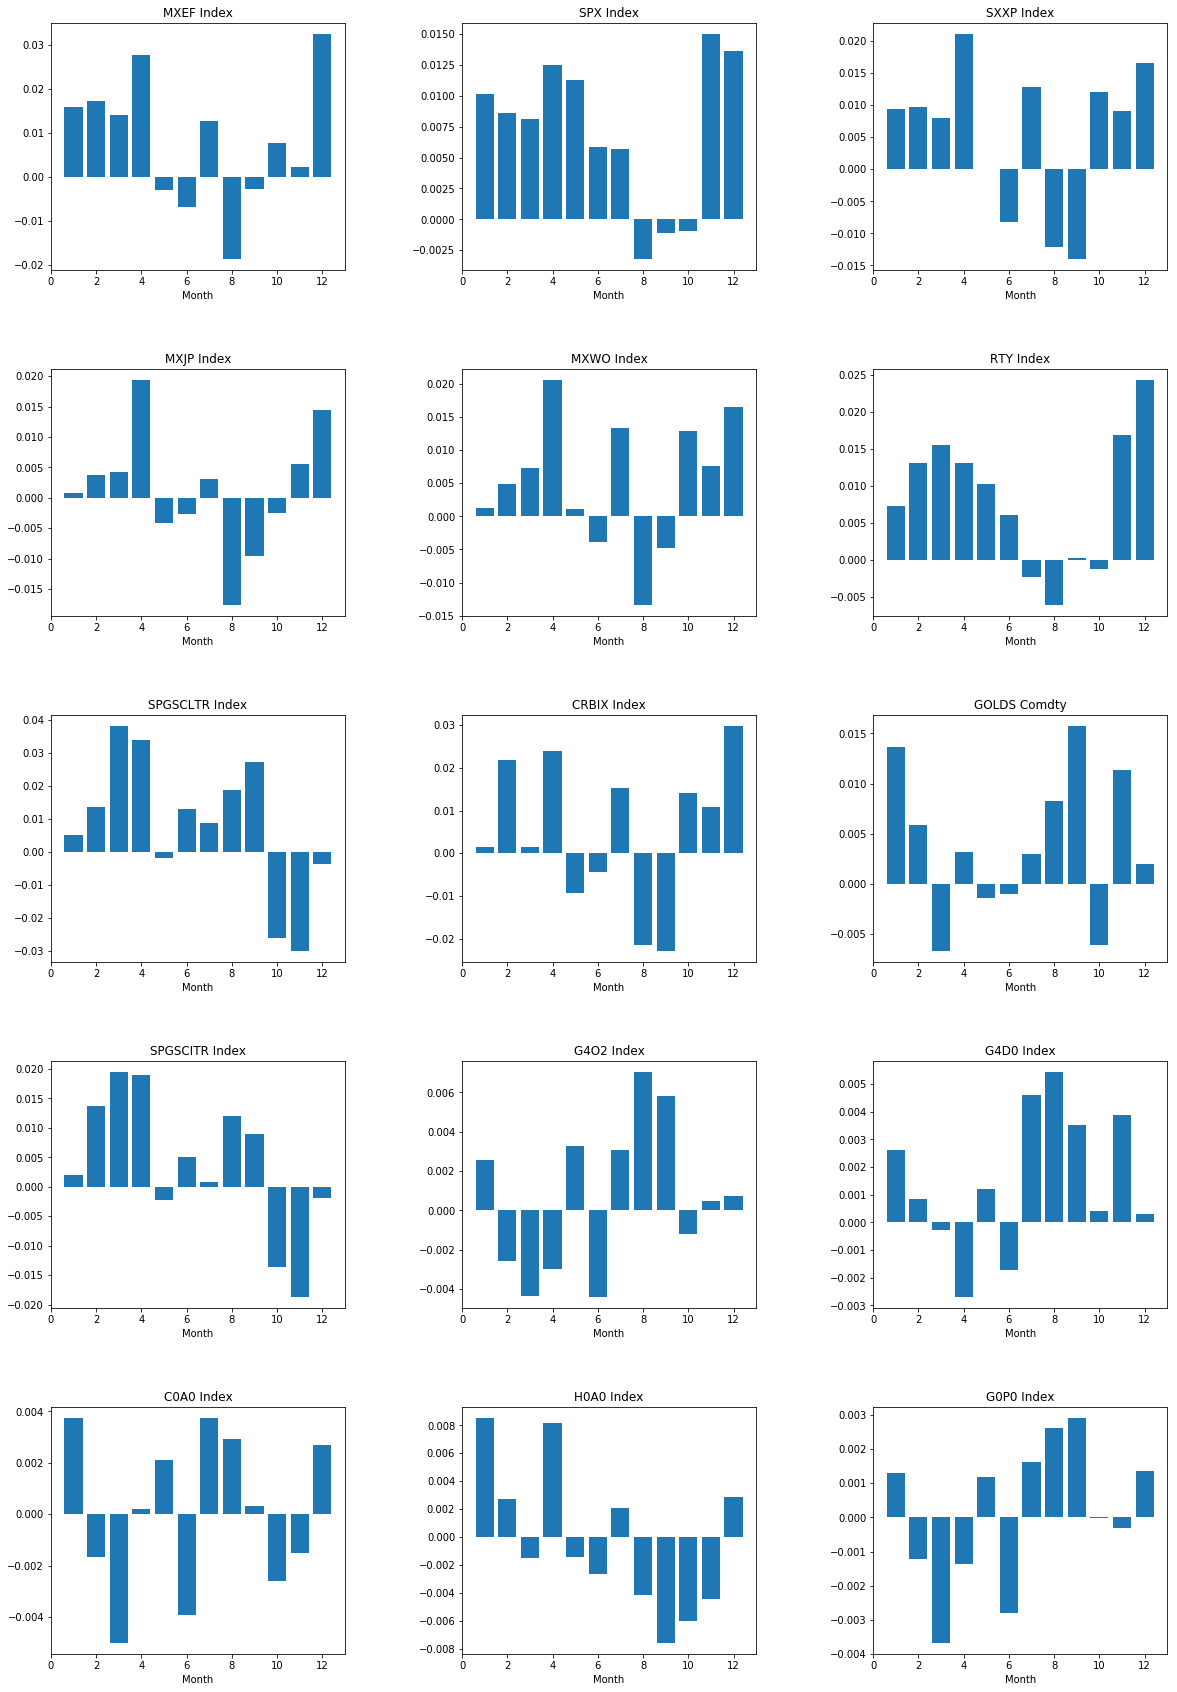

In [15]:
plot_df(calendar_month_return, plt.bar)

### Average calendar quarter return

In [16]:
avg_1m_return['Quarter'] = pd.PeriodIndex(avg_1m_return['Date'], freq='Q').strftime('Q%q')
calendar_quarter_return = avg_1m_return.drop(columns = ['Month']).groupby(['Quarter']).mean() * 3
calendar_quarter_return

,MXEF Index,SPX Index,SXXP Index,MXJP Index,MXWO Index,RTY Index,SPGSCLTR Index,CRBIX Index,GOLDS Comdty,SPGSCITR Index,G4O2 Index,G4D0 Index,C0A0 Index,H0A0 Index,G0P0 Index
Quarter,,,,,,,,,,,,,,,
Q1,0.046930,0.026896,0.027106,0.008820,0.013516,0.035859,0.056731,0.024816,0.012891,0.035232,-0.004344,0.003204,-0.002923,0.009709,-0.003590
Q2,0.017952,0.029555,0.012899,0.012647,0.017791,0.029477,0.045245,0.010178,0.000780,0.021821,-0.004046,-0.003176,-0.001602,0.004079,-0.003001
Q3,-0.008821,0.001512,-0.012827,-0.024098,-0.004728,-0.008070,0.054663,-0.028609,0.026675,0.021748,0.015928,0.013592,0.007043,-0.009452,0.007150
Q4,0.042268,0.027714,0.037594,0.017347,0.037034,0.039893,-0.059639,0.054831,0.007243,-0.034066,0.000033,0.004589,-0.001402,-0.007507,0.001028


A mixed graph is shown below, please zoom in if you cannot see the bars clearly

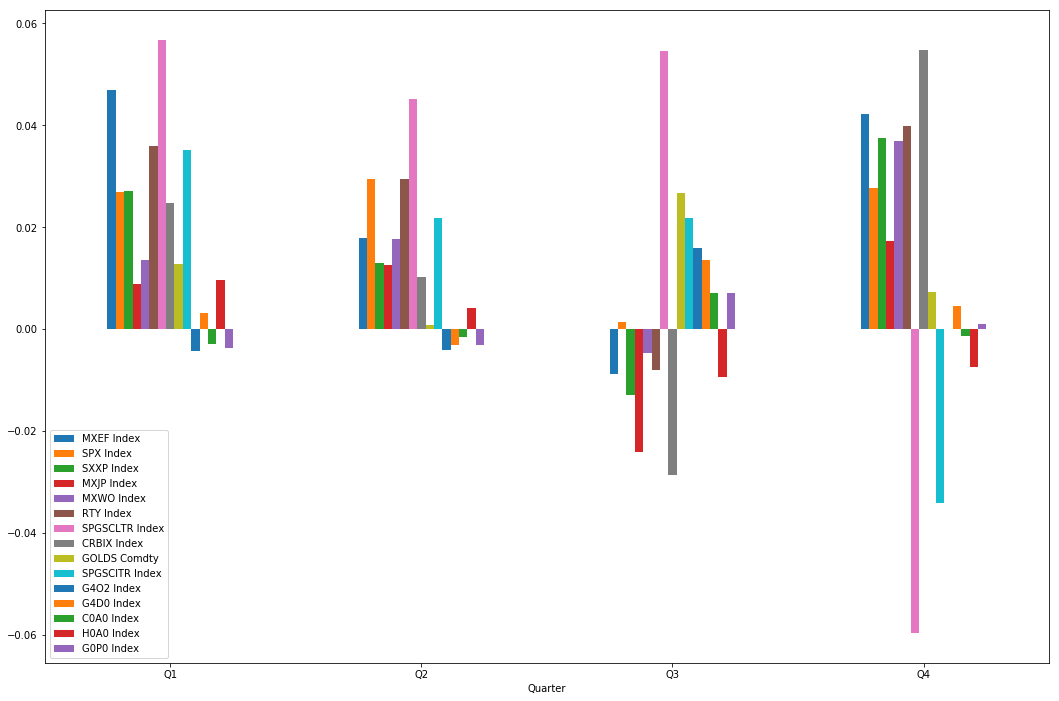

In [17]:
plot_bar(calendar_quarter_return)

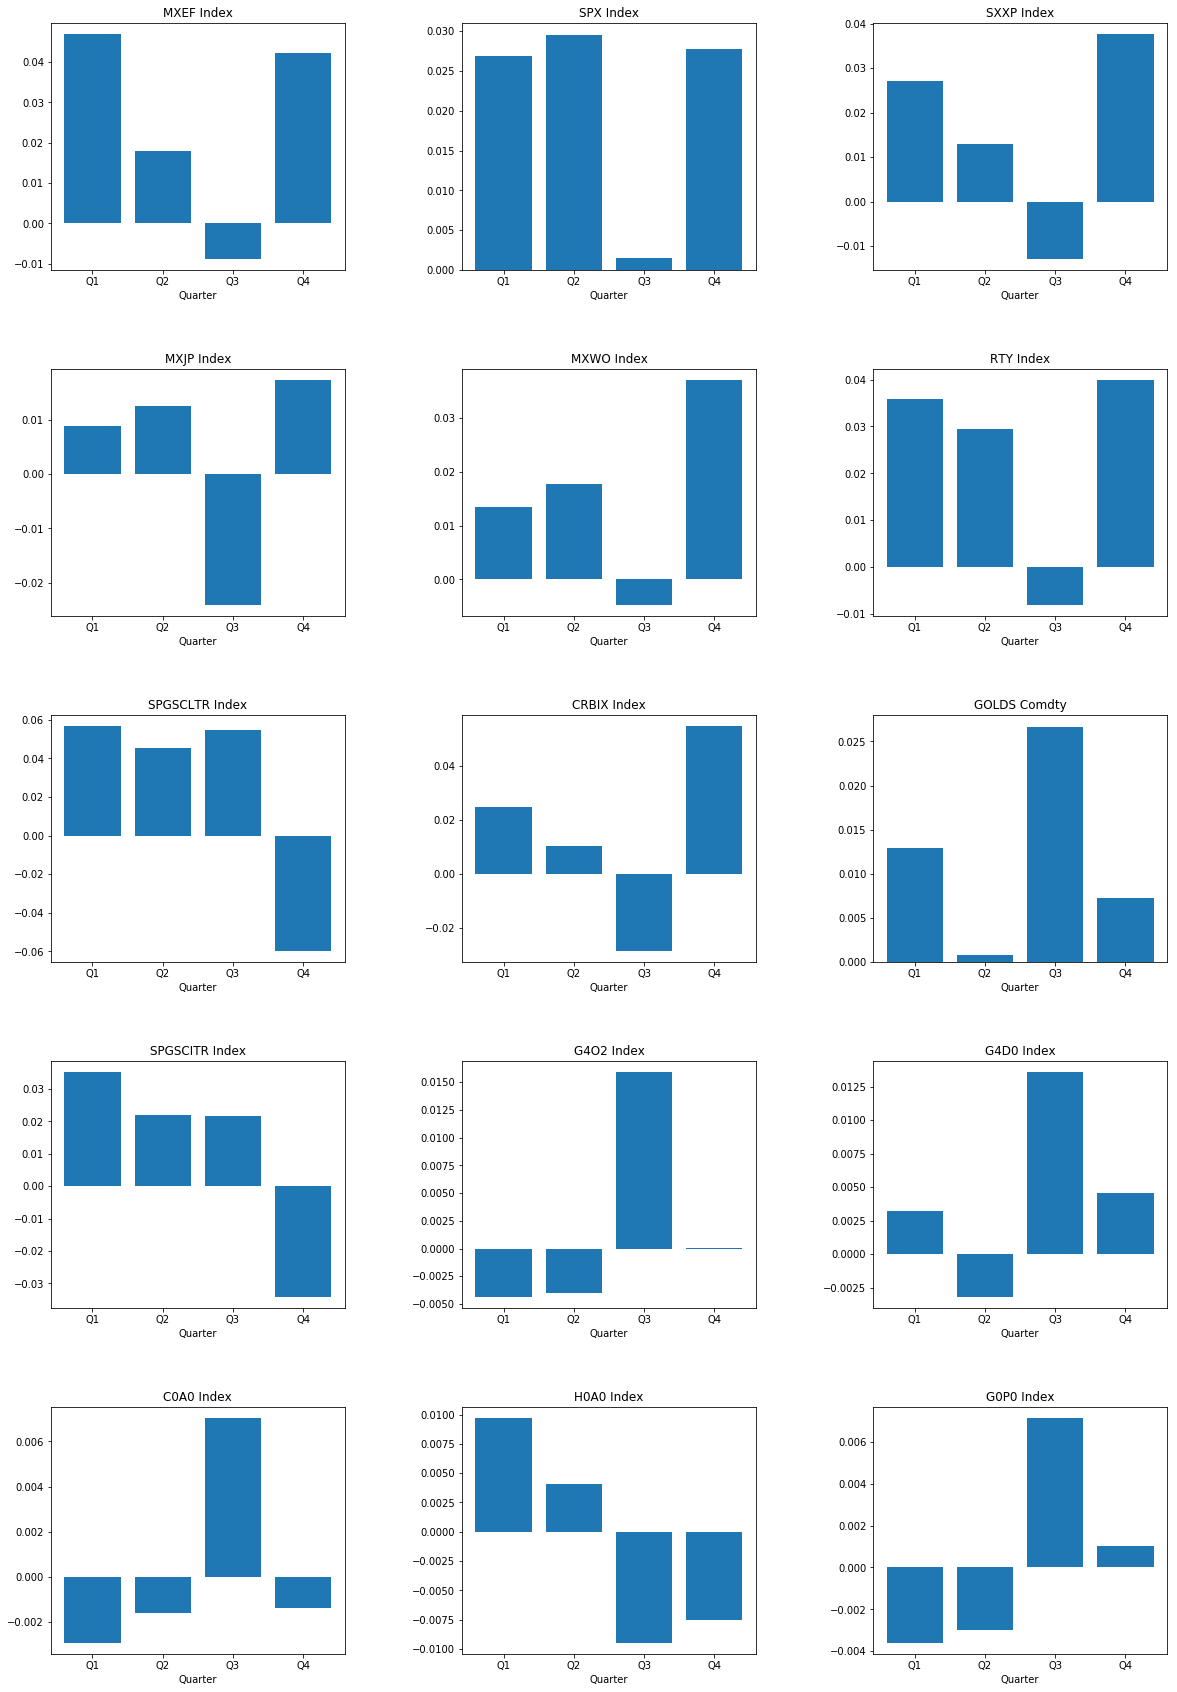

In [18]:
plot_df(calendar_quarter_return, plt.bar)

## Autocorrelations (1 month - 36 months)

In [19]:
avg_1m_return = avg_1m_return.drop(columns = ['Quarter','Month','Date'])

In [20]:
def compute_autocor(df, max_lag=36):
    """
    Compute autocorrelation for each time series
    @df: Pandas DataFrame (Date, Return)
    @max_lag: integer (max lag for autocorrelation)
    @return: Pandas DataFrame (lag, autocorrelation)
    """
    df_autocor = {'lag': range(1, max_lag+1)}
    
    for col in df.columns.values:
        # Select specific column and initialize autocorrelation list
        time_series = df[col]
        time_series_autocor = []
        
        for lag in range(1, max_lag+1):
            # Compute autocorrelation for each lag
            time_series_autocor.append(time_series.autocorr(lag=lag))
        
        df_autocor[col] = time_series_autocor
        
    df_autocor = pd.DataFrame(df_autocor)
    df_autocor = df_autocor.set_index('lag')
        
    return df_autocor

In [21]:
autocor_return = compute_autocor(avg_1m_return)
autocor_return

,MXEF Index,SPX Index,SXXP Index,MXJP Index,MXWO Index,RTY Index,SPGSCLTR Index,CRBIX Index,GOLDS Comdty,SPGSCITR Index,G4O2 Index,G4D0 Index,C0A0 Index,H0A0 Index,G0P0 Index
lag,,,,,,,,,,,,,,,
1,0.159568,0.214770,0.135855,0.090031,0.042979,0.063283,0.203563,0.150634,-0.088573,0.187153,0.023228,0.060626,0.107895,0.319776,0.057081
2,0.070552,-0.008123,0.004563,0.039792,-0.036994,-0.021356,0.042973,0.140832,-0.035682,0.039403,-0.133966,-0.009942,-0.121396,0.002574,-0.107149
3,0.035717,0.049390,0.056447,0.045944,0.048435,-0.051175,0.046326,0.080432,0.021968,0.062960,0.015039,0.131487,-0.039070,0.081368,-0.008955
4,-0.071730,0.071910,0.064345,0.019284,0.010377,-0.031966,-0.068744,0.046643,-0.024086,0.017998,0.014712,0.039365,0.032463,0.113891,-0.004143
5,-0.004203,0.074774,-0.001067,0.030359,0.044083,-0.089547,-0.040190,-0.070665,0.047887,0.012298,-0.076196,-0.081730,0.000696,-0.008122,-0.038695
6,-0.109303,-0.101398,-0.002965,-0.093390,-0.056196,-0.096729,0.034785,-0.066852,0.030710,0.047625,-0.117415,-0.084675,0.013977,-0.104667,-0.078631
7,0.029082,-0.010615,-0.040840,-0.018707,-0.004594,0.011903,-0.045083,-0.096981,0.019821,-0.093720,-0.031916,0.046707,0.003849,-0.089681,-0.006045
8,-0.017675,0.110851,0.101874,0.025980,0.050082,0.069503,0.005986,-0.088760,0.021770,-0.042700,0.006398,-0.008450,-0.038428,-0.000623,0.018665
9,0.024191,0.041836,0.030606,0.050419,-0.008220,-0.029969,0.028714,-0.028251,-0.071005,-0.020458,0.059208,-0.055323,0.001217,0.023862,0.057235


A mixed graph is shown below, please zoom in if you cannot see the bars clearly

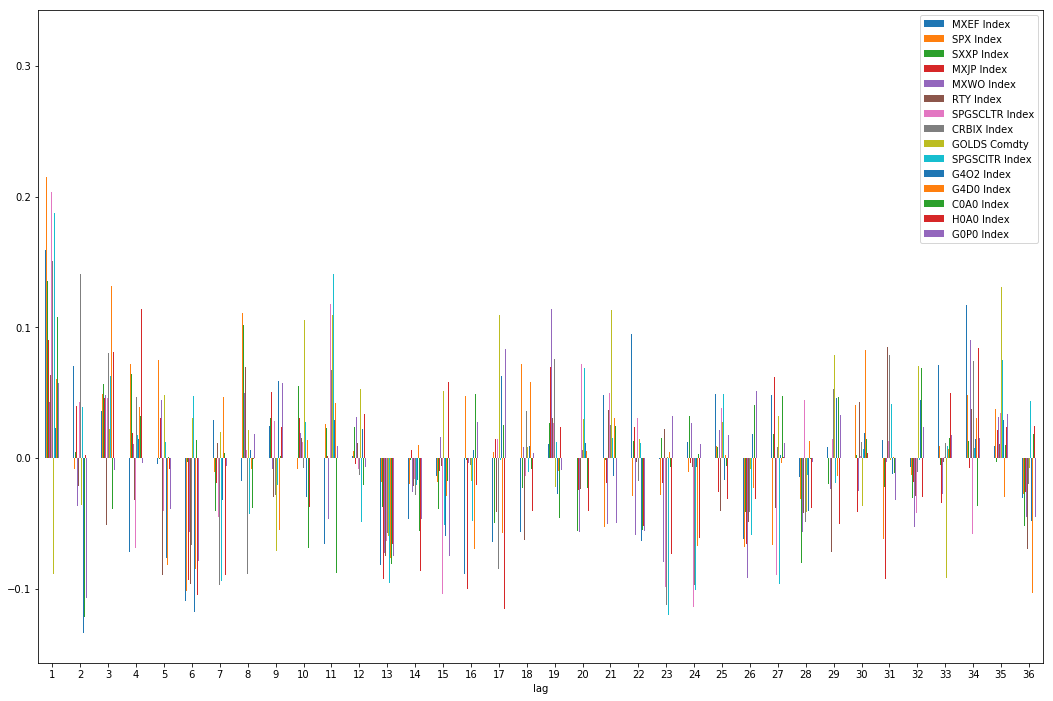

In [22]:
plot_bar(autocor_return)

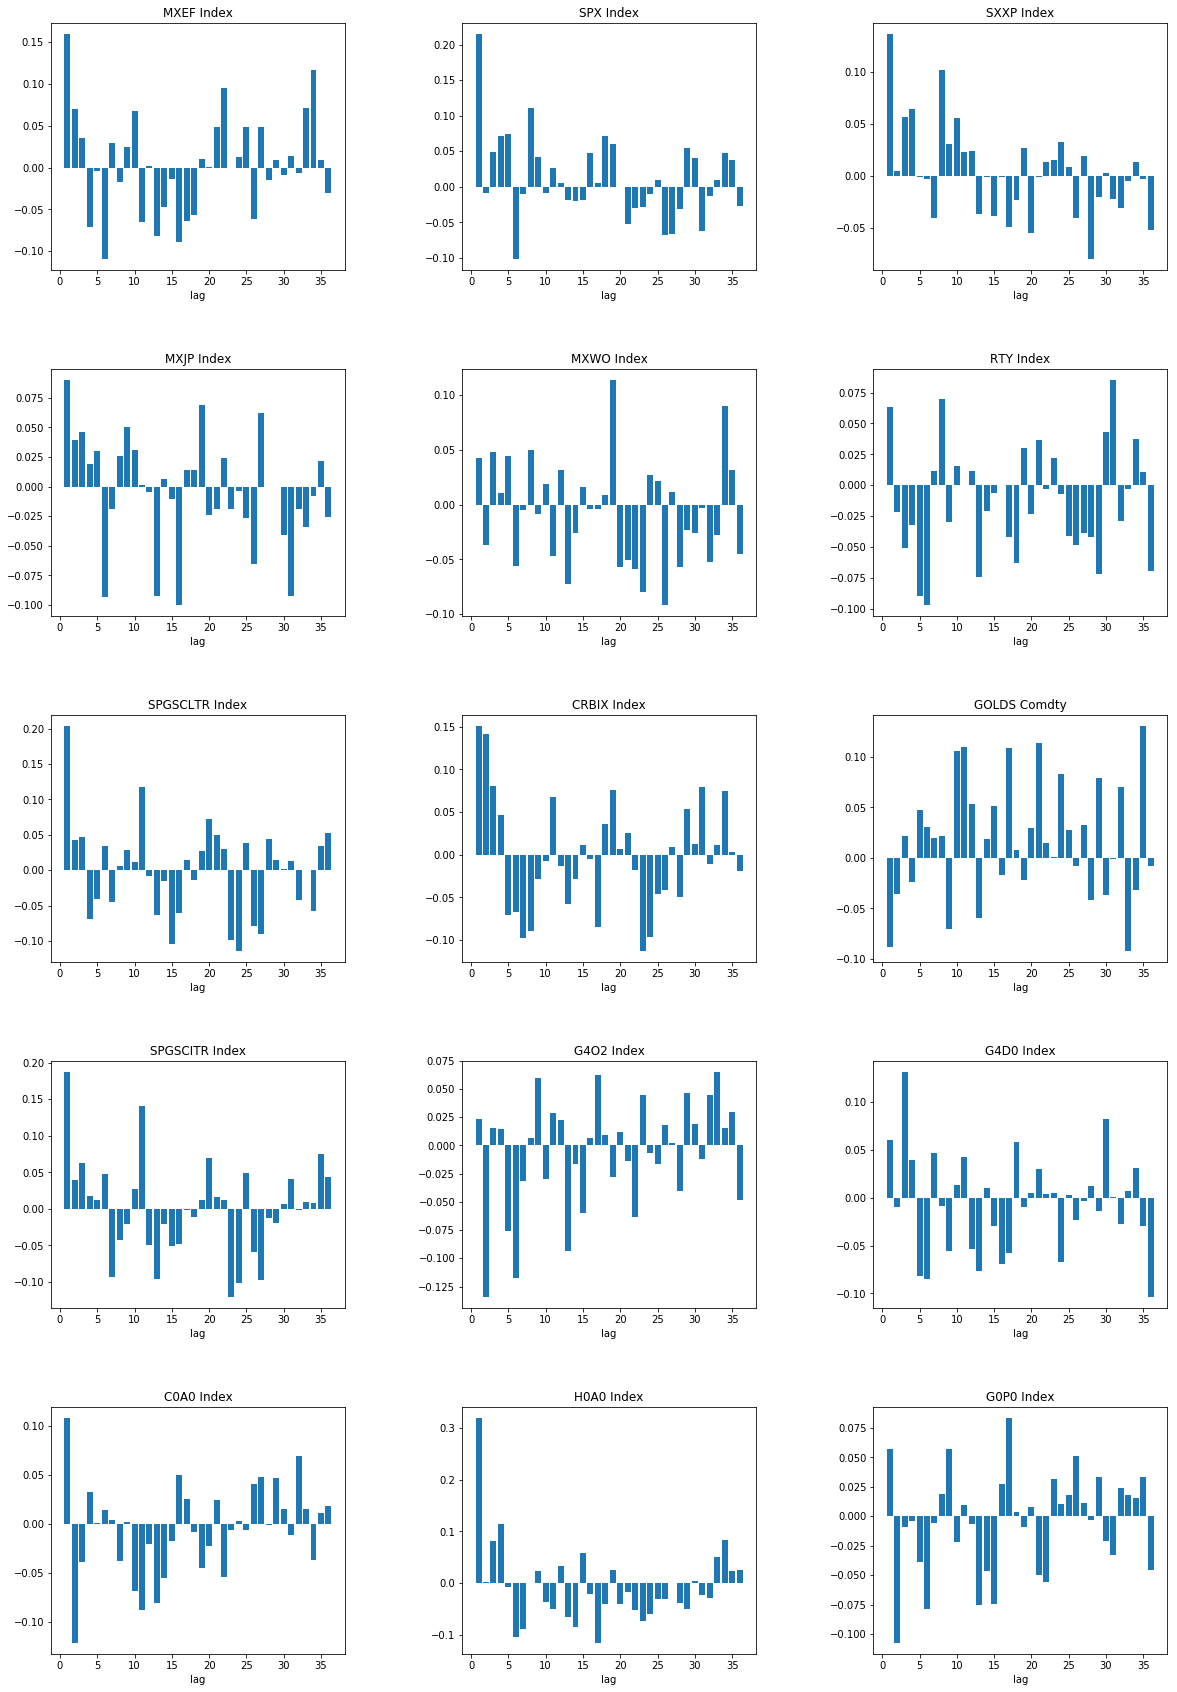

In [23]:
plot_df(autocor_return, plt.bar)